### Introduction to GPS Tracking of birds

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Load the dataset

In [2]:
birddata = pd.read_csv("bird_tracking.csv")

In [3]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


### Simple Data Visualization

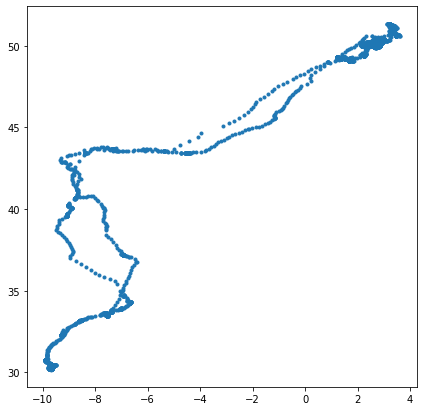

In [5]:
ix = birddata.bird_name == "Eric"
x , y, = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")
plt.show()

In [6]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

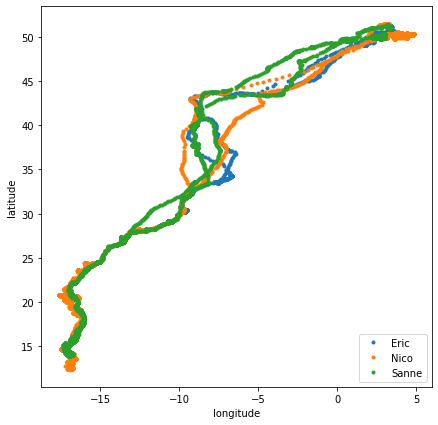

In [7]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x,y, = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y, '.',label = bird_name)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend(loc = 'lower right')
plt.savefig("DATA/3traj.pdf")
#plt.show()

### Examining the flight speed
     Examine the 2D flight speed of the birds
     Dealing with data those are not numeric

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

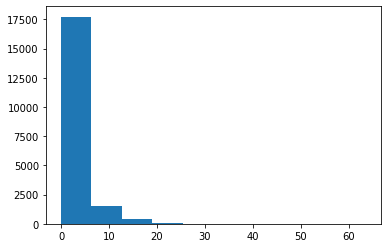

In [8]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
plt.hist(speed)

In [9]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

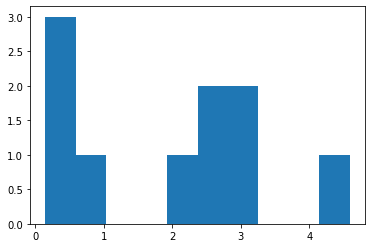

In [10]:
plt.hist(speed[:10]);
plt.show()

In [11]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [12]:
np.isnan(speed).any()

True

In [13]:
#find how many nans are in the array
np.sum(np.isnan(speed))

85

In [14]:
ind = np.isnan(speed)

In [15]:
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Frequency')

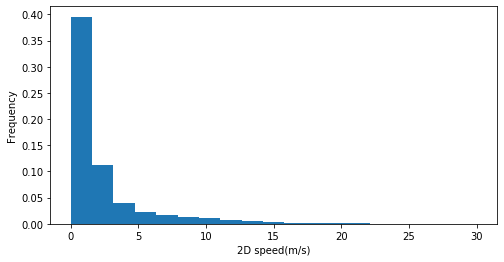

In [16]:
plt.figure(figsize = (8,4))
speed = birddata.speed_2d[birddata.bird_name == 'Eric']
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed = True)
plt.xlabel("2D speed(m/s)")
plt.ylabel("Frequency")

### Using Datetime

In [17]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [20]:
datetime.datetime.today()

datetime.datetime(2020, 1, 5, 13, 14, 59, 157435)

In [21]:
time1 = datetime.datetime.today()
time1 

datetime.datetime(2020, 1, 5, 13, 15, 35, 416554)

In [23]:
time2 = datetime.datetime.today()
time2

datetime.datetime(2020, 1, 5, 13, 15, 59, 530566)

In [24]:
time2 - time1

datetime.timedelta(seconds=24, microseconds=114012)

In [26]:
birddata.date_time[0]

'2013-08-15 00:18:08+00'

In [28]:
date_str = birddata.date_time[0]
date_str

'2013-08-15 00:18:08+00'

In [30]:
date_str[:-3]

'2013-08-15 00:18:08'

In [32]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [34]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [35]:
timestamps

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48),
 datetime.datetime(2013, 8, 15, 4, 3, 39),
 datetime.datetime(2013, 8, 15, 4, 18, 40),
 datetime.datetime(2013, 8, 15, 4, 33, 53),
 datetime.datetime(2013, 8, 15, 4, 49, 6),
 datetime.datetime(2013, 8, 15, 5, 4, 45),
 datetime.datetime(2013, 8, 15, 5, 20, 9),
 datetime.datetime(2013, 8, 15, 5, 35, 4),
 datetime.datetime(2013, 8, 15, 5, 49, 58),
 datetime.datetime(2013, 8, 15, 6, 4, 56),
 datetime.datetime(2013, 8, 15, 6, 19, 54),
 datetime.datetime(2013, 8, 15, 6, 34, 50),
 datetime.datetime(2013, 8, 15, 6, 49, 43),
 datetime.datetime(2013, 8, 15, 7, 4, 40)

In [36]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [37]:
#construct a pandas series object to insert timestamp from python list info
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)

In [38]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [40]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [41]:
#create a list that captures the amount of time that has elapsed since the beginning of data collections

times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]

In [42]:
elapsed_time

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40'),
 Timedelta('0 days 03:45:31'),
 Timedelta('0 days 04:00:32'),
 Timedelta('0 days 04:15:45'),
 Timedelta('0 days 04:30:58'),
 Timedelta('0 days 04:46:37'),
 Timedelta('0 days 05:02:01'),
 Timedelta('0 days 05:16:56'),
 Timedelta('0 days 05:31:50'),
 Timedelta('0 days 05:46:48'),
 Timedelta('0 days 06:01:46'),
 Timedelta('0 days 06:16:42'),
 Timedelta('0 days 06:31:35'),
 Timedelta('0 days 06:46:32'),
 Timedelta('0 days 07:01:27'),
 Timedelta('0 days 07:16:23'),
 Timedelta('0 days 07:31:21'),
 Timedelta('0 days 07:46:48'),
 Timedelta('0 days 08:01:44'),
 Timedelta('0 days 08:16:39'),
 Timedelta('0 days 08:31:43'),
 Timedelta('0 days 08:46:55'),
 Timedelta('0 days 09:01:59'),
 Timedel

In [43]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [44]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [46]:
#calculate days
elapsed_time[1000] / datetime.timedelta(days = 1)

12.084722222222222

In [48]:
#calculate hours
elapsed_time[1000] / datetime.timedelta(hours = 1)

290.03333333333336

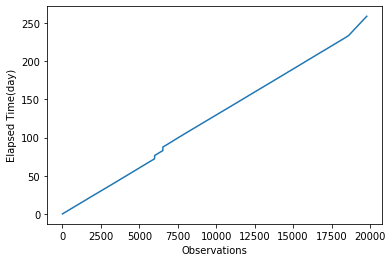

In [50]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days = 1))
plt.xlabel('Observations')
plt.ylabel('Elapsed Time(day)')
plt.savefig("birds_info_timeplot.pdf")
plt.show()

# Calculating Daily mean speed.

In [51]:
data = birddata[birddata.bird_name == 'Eric']
data

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...
19790,12,2014-04-30 21:51:26+00,851,120.619823,51.322966,3.216576,0.064031,Eric,2014-04-30 21:51:26
19791,34,2014-04-30 22:21:33+00,851,35.683036,51.323116,3.216659,1.942395,Eric,2014-04-30 22:21:33
19792,1,2014-04-30 22:51:41+00,851,-52.808233,51.322979,3.216463,1.678392,Eric,2014-04-30 22:51:41
19793,7,2014-04-30 23:21:34+00,851,-38.675683,51.322986,3.216340,0.208087,Eric,2014-04-30 23:21:34


In [53]:
times = data.timestamp
elapsed_time =[time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)
elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [54]:
for (i,t) in enumerate(elapsed_days):
    print('index is: ' +str(i)+ 'time is: ' +str(t))

index is: 0time is: 0.0
index is: 1time is: 0.02082175925925926
index is: 2time is: 0.04155092592592593
index is: 3time is: 0.06230324074074074
index is: 4time is: 0.0830324074074074
index is: 5time is: 0.10381944444444445
index is: 6time is: 0.11417824074074075
index is: 7time is: 0.12452546296296296
index is: 8time is: 0.1350347222222222
index is: 9time is: 0.14560185185185184
index is: 10time is: 0.1566087962962963
index is: 11time is: 0.16703703703703704
index is: 12time is: 0.17760416666666667
index is: 13time is: 0.1881712962962963
index is: 14time is: 0.19903935185185184
index is: 15time is: 0.2097337962962963
index is: 16time is: 0.2200925925925926
index is: 17time is: 0.23043981481481482
index is: 18time is: 0.24083333333333334
index is: 19time is: 0.25122685185185184
index is: 20time is: 0.2615972222222222
index is: 21time is: 0.2719328703703704
index is: 22time is: 0.2823148148148148
index is: 23time is: 0.2926736111111111
index is: 24time is: 0.3030439814814815
index is: 25

index is: 1554time is: 18.69215277777778
index is: 1555time is: 18.70255787037037
index is: 1556time is: 18.71300925925926
index is: 1557time is: 18.723449074074075
index is: 1558time is: 18.733854166666667
index is: 1559time is: 18.744305555555556
index is: 1560time is: 18.755011574074075
index is: 1561time is: 18.765613425925928
index is: 1562time is: 18.77605324074074
index is: 1563time is: 18.78642361111111
index is: 1564time is: 18.796793981481482
index is: 1565time is: 18.807372685185186
index is: 1566time is: 18.81806712962963
index is: 1567time is: 18.8284375
index is: 1568time is: 18.838819444444443
index is: 1569time is: 18.849189814814814
index is: 1570time is: 18.859560185185185
index is: 1571time is: 18.880324074074075
index is: 1572time is: 18.901064814814816
index is: 1573time is: 18.922569444444445
index is: 1574time is: 18.943275462962962
index is: 1575time is: 18.96400462962963
index is: 1576time is: 18.984780092592594
index is: 1577time is: 19.00550925925926
index is

index is: 2554time is: 30.674907407407407
index is: 2555time is: 30.685347222222223
index is: 2556time is: 30.695717592592594
index is: 2557time is: 30.70605324074074
index is: 2558time is: 30.716435185185187
index is: 2559time is: 30.726967592592594
index is: 2560time is: 30.73789351851852
index is: 2561time is: 30.74827546296296
index is: 2562time is: 30.758680555555557
index is: 2563time is: 30.769247685185185
index is: 2564time is: 30.779594907407407
index is: 2565time is: 30.78997685185185
index is: 2566time is: 30.800324074074073
index is: 2567time is: 30.81070601851852
index is: 2568time is: 30.821053240740742
index is: 2569time is: 30.831469907407406
index is: 2570time is: 30.841828703703705
index is: 2571time is: 30.852511574074075
index is: 2572time is: 30.86292824074074
index is: 2573time is: 30.88396990740741
index is: 2574time is: 30.90513888888889
index is: 2575time is: 30.925868055555554
index is: 2576time is: 30.946620370370372
index is: 2577time is: 30.96736111111111
i

index is: 3553time is: 42.66997685185185
index is: 3554time is: 42.6803587962963
index is: 3555time is: 42.69070601851852
index is: 3556time is: 42.70135416666667
index is: 3557time is: 42.712037037037035
index is: 3558time is: 42.72252314814815
index is: 3559time is: 42.732962962962965
index is: 3560time is: 42.7433912037037
index is: 3561time is: 42.75386574074074
index is: 3562time is: 42.764212962962965
index is: 3563time is: 42.77501157407407
index is: 3564time is: 42.78535879629629
index is: 3565time is: 42.79569444444444
index is: 3566time is: 42.806099537037035
index is: 3567time is: 42.816435185185185
index is: 3568time is: 42.82681712962963
index is: 3569time is: 42.83730324074074
index is: 3570time is: 42.84820601851852
index is: 3571time is: 42.85869212962963
index is: 3572time is: 42.87953703703704
index is: 3573time is: 42.90077546296296
index is: 3574time is: 42.92180555555556
index is: 3575time is: 42.9425462962963
index is: 3576time is: 42.963287037037034
index is: 357

index is: 4397time is: 52.85570601851852
index is: 4398time is: 52.87644675925926
index is: 4399time is: 52.897210648148146
index is: 4400time is: 52.91792824074074
index is: 4401time is: 52.93868055555556
index is: 4402time is: 52.95943287037037
index is: 4403time is: 52.98020833333333
index is: 4404time is: 53.00125
index is: 4405time is: 53.022025462962965
index is: 4406time is: 53.04302083333334
index is: 4407time is: 53.06386574074074
index is: 4408time is: 53.08460648148148
index is: 4409time is: 53.10547453703704
index is: 4410time is: 53.116030092592595
index is: 4411time is: 53.126608796296296
index is: 4412time is: 53.137372685185184
index is: 4413time is: 53.14775462962963
index is: 4414time is: 53.15833333333333
index is: 4415time is: 53.16866898148148
index is: 4416time is: 53.17903935185185
index is: 4417time is: 53.19979166666667
index is: 4418time is: 53.210150462962964
index is: 4419time is: 53.220625
index is: 4420time is: 53.231458333333336
index is: 4421time is: 53.

index is: 5523time is: 66.55403935185186
index is: 5524time is: 66.56440972222222
index is: 5525time is: 66.57478009259259
index is: 5526time is: 66.58517361111112
index is: 5527time is: 66.59554398148148
index is: 5528time is: 66.60590277777777
index is: 5529time is: 66.61642361111112
index is: 5530time is: 66.62716435185185
index is: 5531time is: 66.63797453703704
index is: 5532time is: 66.64835648148149
index is: 5533time is: 66.65903935185185
index is: 5534time is: 66.66943287037037
index is: 5535time is: 66.67981481481482
index is: 5536time is: 66.69018518518519
index is: 5537time is: 66.70059027777778
index is: 5538time is: 66.71104166666667
index is: 5539time is: 66.72158564814815
index is: 5540time is: 66.7321412037037
index is: 5541time is: 66.74305555555556
index is: 5542time is: 66.7534837962963
index is: 5543time is: 66.76386574074074
index is: 5544time is: 66.77424768518519
index is: 5545time is: 66.7847337962963
index is: 5546time is: 66.79520833333333
index is: 5547time 

index is: 6804time is: 90.79986111111111
index is: 6805time is: 90.8102199074074
index is: 6806time is: 90.82060185185185
index is: 6807time is: 90.83097222222223
index is: 6808time is: 90.84133101851852
index is: 6809time is: 90.85170138888888
index is: 6810time is: 90.86209490740741
index is: 6811time is: 90.88319444444444
index is: 6812time is: 90.90413194444444
index is: 6813time is: 90.9251736111111
index is: 6814time is: 90.94608796296296
index is: 6815time is: 90.96726851851852
index is: 6816time is: 90.9880324074074
index is: 6817time is: 91.00902777777777
index is: 6818time is: 91.0505787037037
index is: 6819time is: 91.07134259259259
index is: 6820time is: 91.09208333333333
index is: 6821time is: 91.11319444444445
index is: 6822time is: 91.12354166666667
index is: 6823time is: 91.13391203703704
index is: 6824time is: 91.1442824074074
index is: 6825time is: 91.15467592592593
index is: 6826time is: 91.1650462962963
index is: 6827time is: 91.1754050925926
index is: 6828time is: 

index is: 7799time is: 103.16578703703703
index is: 7800time is: 103.17619212962963
index is: 7801time is: 103.18671296296296
index is: 7802time is: 103.19744212962964
index is: 7803time is: 103.20796296296297
index is: 7804time is: 103.21840277777778
index is: 7805time is: 103.22878472222222
index is: 7806time is: 103.23945601851852
index is: 7807time is: 103.24988425925926
index is: 7808time is: 103.26023148148148
index is: 7809time is: 103.27060185185185
index is: 7810time is: 103.28101851851852
index is: 7811time is: 103.29164351851851
index is: 7812time is: 103.30224537037037
index is: 7813time is: 103.31306712962963
index is: 7814time is: 103.32339120370371
index is: 7815time is: 103.33376157407407
index is: 7816time is: 103.34413194444444
index is: 7817time is: 103.35451388888889
index is: 7818time is: 103.36486111111111
index is: 7819time is: 103.37523148148148
index is: 7820time is: 103.38560185185185
index is: 7821time is: 103.3960300925926
index is: 7822time is: 103.40788194

index is: 8610time is: 112.85363425925927
index is: 8611time is: 112.87436342592592
index is: 8612time is: 112.89548611111111
index is: 8613time is: 112.91619212962964
index is: 8614time is: 112.93695601851852
index is: 8615time is: 112.95798611111111
index is: 8616time is: 112.9787962962963
index is: 8617time is: 112.99953703703704
index is: 8618time is: 113.02027777777778
index is: 8619time is: 113.04126157407407
index is: 8620time is: 113.06194444444445
index is: 8621time is: 113.08288194444444
index is: 8622time is: 113.10363425925927
index is: 8623time is: 113.11398148148149
index is: 8624time is: 113.12436342592592
index is: 8625time is: 113.13472222222222
index is: 8626time is: 113.14565972222222
index is: 8627time is: 113.15679398148148
index is: 8628time is: 113.16712962962963
index is: 8629time is: 113.1775462962963
index is: 8630time is: 113.18787037037038
index is: 8631time is: 113.19824074074074
index is: 8632time is: 113.20862268518519
index is: 8633time is: 113.218993055

index is: 9690time is: 125.82215277777777
index is: 9691time is: 125.83252314814816
index is: 9692time is: 125.84289351851852
index is: 9693time is: 125.85327546296297
index is: 9694time is: 125.87402777777778
index is: 9695time is: 125.8951388888889
index is: 9696time is: 125.91586805555555
index is: 9697time is: 125.93659722222222
index is: 9698time is: 125.95734953703703
index is: 9699time is: 125.97829861111111
index is: 9700time is: 125.99994212962963
index is: 9701time is: 126.0206712962963
index is: 9702time is: 126.04142361111111
index is: 9703time is: 126.06216435185185
index is: 9704time is: 126.08291666666666
index is: 9705time is: 126.10399305555555
index is: 9706time is: 126.11438657407408
index is: 9707time is: 126.1249074074074
index is: 9708time is: 126.13560185185185
index is: 9709time is: 126.14616898148148
index is: 9710time is: 126.15694444444445
index is: 9711time is: 126.16733796296296
index is: 9712time is: 126.17770833333333
index is: 9713time is: 126.1880902777

index is: 10697time is: 137.9182986111111
index is: 10698time is: 137.93905092592593
index is: 10699time is: 137.95989583333332
index is: 10700time is: 137.98085648148148
index is: 10701time is: 138.00212962962962
index is: 10702time is: 138.02305555555554
index is: 10703time is: 138.04410879629629
index is: 10704time is: 138.06515046296298
index is: 10705time is: 138.0858912037037
index is: 10706time is: 138.10674768518518
index is: 10707time is: 138.11719907407408
index is: 10708time is: 138.12755787037037
index is: 10709time is: 138.1380787037037
index is: 10710time is: 138.14888888888888
index is: 10711time is: 138.1592361111111
index is: 10712time is: 138.16962962962964
index is: 10713time is: 138.17996527777777
index is: 10714time is: 138.190625
index is: 10715time is: 138.20119212962962
index is: 10716time is: 138.21177083333333
index is: 10717time is: 138.22217592592594
index is: 10718time is: 138.23255787037036
index is: 10719time is: 138.24291666666667
index is: 10720time is:

index is: 11976time is: 153.36871527777777
index is: 11977time is: 153.37907407407408
index is: 11978time is: 153.3894212962963
index is: 11979time is: 153.39980324074074
index is: 11980time is: 153.41016203703703
index is: 11981time is: 153.42055555555555
index is: 11982time is: 153.4309027777778
index is: 11983time is: 153.44127314814816
index is: 11984time is: 153.4516550925926
index is: 11985time is: 153.46207175925926
index is: 11986time is: 153.47239583333334
index is: 11987time is: 153.48289351851852
index is: 11988time is: 153.49372685185185
index is: 11989time is: 153.50405092592592
index is: 11990time is: 153.51462962962964
index is: 11991time is: 153.525
index is: 11992time is: 153.53537037037037
index is: 11993time is: 153.5461226851852
index is: 11994time is: 153.5564699074074
index is: 11995time is: 153.56684027777777
index is: 11996time is: 153.57725694444446
index is: 11997time is: 153.58765046296296
index is: 11998time is: 153.59793981481482
index is: 11999time is: 153

index is: 13049time is: 166.30128472222222
index is: 13050time is: 166.31166666666667
index is: 13051time is: 166.32204861111111
index is: 13052time is: 166.33243055555556
index is: 13053time is: 166.3428125
index is: 13054time is: 166.35328703703703
index is: 13055time is: 166.36371527777777
index is: 13056time is: 166.3740740740741
index is: 13057time is: 166.38494212962962
index is: 13058time is: 166.39539351851852
index is: 13059time is: 166.4061111111111
index is: 13060time is: 166.41688657407408
index is: 13061time is: 166.42721064814816
index is: 13062time is: 166.43760416666666
index is: 13063time is: 166.44797453703703
index is: 13064time is: 166.45836805555555
index is: 13065time is: 166.46873842592592
index is: 13066time is: 166.4790972222222
index is: 13067time is: 166.4897222222222
index is: 13068time is: 166.50177083333332
index is: 13069time is: 166.5122685185185
index is: 13070time is: 166.52260416666667
index is: 13071time is: 166.5329976851852
index is: 13072time is: 

index is: 14201time is: 180.201875
index is: 14202time is: 180.21224537037037
index is: 14203time is: 180.22283564814813
index is: 14204time is: 180.23320601851853
index is: 14205time is: 180.2439699074074
index is: 14206time is: 180.2542824074074
index is: 14207time is: 180.26466435185185
index is: 14208time is: 180.2750462962963
index is: 14209time is: 180.28541666666666
index is: 14210time is: 180.2957986111111
index is: 14211time is: 180.30637731481482
index is: 14212time is: 180.31686342592593
index is: 14213time is: 180.3272685185185
index is: 14214time is: 180.3377662037037
index is: 14215time is: 180.34855324074073
index is: 14216time is: 180.35892361111112
index is: 14217time is: 180.3692824074074
index is: 14218time is: 180.37966435185186
index is: 14219time is: 180.39005787037038
index is: 14220time is: 180.4003935185185
index is: 14221time is: 180.41112268518518
index is: 14222time is: 180.4215162037037
index is: 14223time is: 180.431875
index is: 14224time is: 180.44226851

index is: 15548time is: 196.4534375
index is: 15549time is: 196.4641550925926
index is: 15550time is: 196.47451388888888
index is: 15551time is: 196.48506944444443
index is: 15552time is: 196.49545138888888
index is: 15553time is: 196.5058564814815
index is: 15554time is: 196.51622685185185
index is: 15555time is: 196.5265625
index is: 15556time is: 196.5369212962963
index is: 15557time is: 196.54729166666667
index is: 15558time is: 196.55765046296295
index is: 15559time is: 196.5680324074074
index is: 15560time is: 196.57881944444443
index is: 15561time is: 196.58916666666667
index is: 15562time is: 196.59951388888888
index is: 15563time is: 196.60988425925925
index is: 15564time is: 196.62025462962964
index is: 15565time is: 196.63063657407406
index is: 15566time is: 196.64100694444446
index is: 15567time is: 196.65141203703703
index is: 15568time is: 196.6621412037037
index is: 15569time is: 196.67247685185185
index is: 15570time is: 196.68288194444443
index is: 15571time is: 196.69

index is: 16569time is: 208.78640046296297
index is: 16570time is: 208.796875
index is: 16571time is: 208.8082986111111
index is: 16572time is: 208.81875
index is: 16573time is: 208.82917824074073
index is: 16574time is: 208.83956018518518
index is: 16575time is: 208.84990740740741
index is: 16576time is: 208.86028935185186
index is: 16577time is: 208.88143518518518
index is: 16578time is: 208.90229166666666
index is: 16579time is: 208.92347222222222
index is: 16580time is: 208.94434027777777
index is: 16581time is: 208.96510416666666
index is: 16582time is: 208.9858449074074
index is: 16583time is: 209.00729166666667
index is: 16584time is: 209.0280787037037
index is: 16585time is: 209.04880787037038
index is: 16586time is: 209.06979166666667
index is: 16587time is: 209.09048611111112
index is: 16588time is: 209.11122685185185
index is: 16589time is: 209.1216087962963
index is: 16590time is: 209.14246527777777
index is: 16591time is: 209.1530439814815
index is: 16592time is: 209.16394

index is: 17692time is: 222.38571759259258
index is: 17693time is: 222.3961226851852
index is: 17694time is: 222.40685185185185
index is: 17695time is: 222.4173148148148
index is: 17696time is: 222.42787037037036
index is: 17697time is: 222.43855324074073
index is: 17698time is: 222.44885416666668
index is: 17699time is: 222.45925925925926
index is: 17700time is: 222.4695949074074
index is: 17701time is: 222.47998842592594
index is: 17702time is: 222.4903587962963
index is: 17703time is: 222.5007175925926
index is: 17704time is: 222.51108796296296
index is: 17705time is: 222.52158564814815
index is: 17706time is: 222.53202546296296
index is: 17707time is: 222.54243055555557
index is: 17708time is: 222.55287037037036
index is: 17709time is: 222.56350694444444
index is: 17710time is: 222.5738425925926
index is: 17711time is: 222.58428240740741
index is: 17712time is: 222.59493055555555
index is: 17713time is: 222.60577546296295
index is: 17714time is: 222.6160763888889
index is: 17715tim

index is: 18476time is: 231.90456018518518
index is: 18477time is: 231.92569444444445
index is: 18478time is: 231.9465162037037
index is: 18479time is: 231.9678240740741
index is: 18480time is: 231.98936342592592
index is: 18481time is: 232.01019675925926
index is: 18482time is: 232.0309259259259
index is: 18483time is: 232.05166666666668
index is: 18484time is: 232.07239583333333
index is: 18485time is: 232.09329861111112
index is: 18486time is: 232.11354166666666
index is: 18487time is: 232.12386574074074
index is: 18488time is: 232.1342476851852
index is: 18489time is: 232.1446412037037
index is: 18490time is: 232.155
index is: 18491time is: 232.16537037037037
index is: 18492time is: 232.17572916666666
index is: 18493time is: 232.18608796296297
index is: 18494time is: 232.19646990740742
index is: 18495time is: 232.20702546296297
index is: 18496time is: 232.21755787037037
index is: 18497time is: 232.22809027777777
index is: 18498time is: 232.25194444444443
index is: 18499time is: 232

index is: 19376time is: 250.0065972222222
index is: 19377time is: 250.0277662037037
index is: 19378time is: 250.0489699074074
index is: 19379time is: 250.07168981481482
index is: 19380time is: 250.09241898148147
index is: 19381time is: 250.11311342592592
index is: 19382time is: 250.13466435185185
index is: 19383time is: 250.15659722222222
index is: 19384time is: 250.1773726851852
index is: 19385time is: 250.1994212962963
index is: 19386time is: 250.2203935185185
index is: 19387time is: 250.24114583333332
index is: 19388time is: 250.26215277777777
index is: 19389time is: 250.28314814814814
index is: 19390time is: 250.30388888888888
index is: 19391time is: 250.3248726851852
index is: 19392time is: 250.34591435185186
index is: 19393time is: 250.3670138888889
index is: 19394time is: 250.38775462962963
index is: 19395time is: 250.4087037037037
index is: 19396time is: 250.4295486111111
index is: 19397time is: 250.45050925925926
index is: 19398time is: 250.47153935185185
index is: 19399time i

In [57]:
next_day = 1
inds = []
daily_mean_speed = []
#tuple of index and time
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute the mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day +=1
        inds = []
print('the days are: ', len(daily_mean_speed))
print('the speeds per day is: ', daily_mean_speed)

the days are:  258
the speeds per day is:  [2.121516513619244, 2.619105236695279, 1.7863149983905395, 2.9454235893858662, 2.4762427460803886, 1.8477070902332322, 2.560404356375535, 1.482814303345286, 1.6162885950348576, 1.5220367121305791, 2.028393720085181, 1.7402841957023534, 1.5411246572674582, 2.110516034907192, 2.0219116434979787, 2.689771361985732, 2.351241357863496, 2.659076347659485, 2.9416171622419505, 1.898409764788526, 2.3327509804317934, 1.6072552805767766, 1.7682757593059097, 2.9943046312787565, 1.9085264007103804, 1.3634392809056228, 2.0222477274232307, 2.72254039303825, 2.269189387498983, 2.0142790500748506, 2.822659710423693, 2.004075379375076, 1.7669075779904866, 1.9567174870023374, 1.6085815765274403, 2.1039007148615303, 2.0923230222020206, 2.077964508508884, 1.7590805790548523, 2.5642674569001462, 2.0224097745761993, 2.5242849164664367, 2.33621733355763, 2.1500196892882166, 1.6971102860729534, 3.175848894110063, 2.3345096275728086, 2.440327594446141, 1.85454085259833

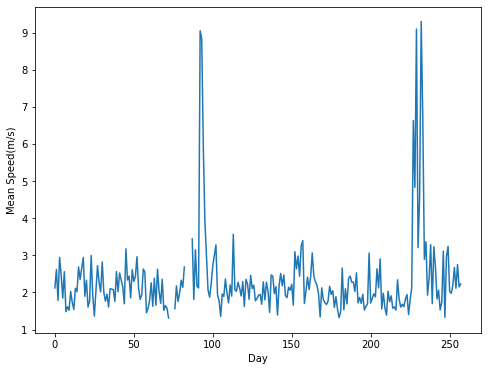

In [58]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean Speed(m/s)")
plt.savefig("birds_info_dms.pdf")
plt.show()

# Using the cartopy library

In [64]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [65]:
data = birddata
data

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [66]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

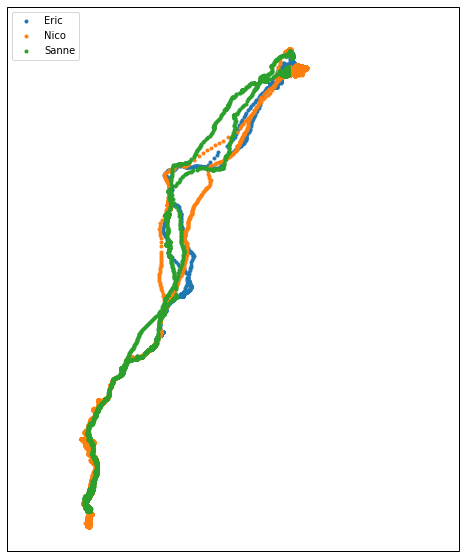

In [68]:
proj = ccrs.Mercator()
plt.figure(figsize = (10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.savefig('birds_info_map_2.pdf')
plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


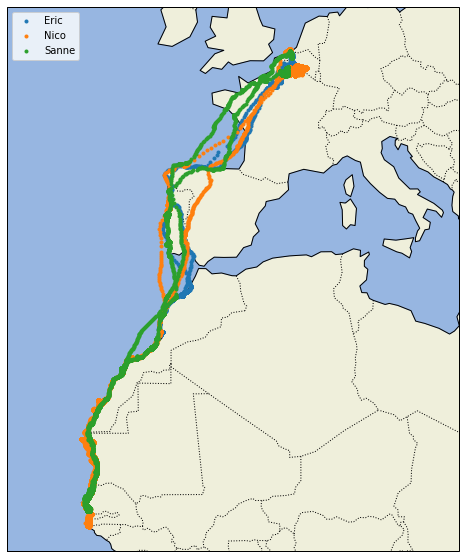

In [69]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')
ax.set_extent((-25.0,20.0,52.0,10.0))

for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.savefig('birds_info_map_3.pdf')
plt.show()

# Exercise
.   pandas makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in     the dataframe. The sample code shows you how to group the dataframe by birdname and then find the average speed_2d for each     bird. Modify the code to assign the mean altitudes of each bird into an object called mean_altitudes.

In [73]:
# First use `groupby` to group up the data
group_by_bird = birddata.groupby("bird_name")

#Now operations are performed on each group
group_by_bird.head()

# Find the mean `altitude` for each bird
# Assign this to `mean altitudes`

mean_altitudes = group_by_bird.altitude.mean()

In [74]:
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

# Exercise 2

    . In this exercise, we will group the flight times by date and calculate the mean altitude within that day. Use groupby to   group the data by date.
    . Calculate the mean altitude per day and store these results as mean_altitudes_perday.

In [78]:
# Convert birddata.date_time to the `pd.datetime` format
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observations
birddata['date'] = birddata.date_time.dt.date

#Check the head of the column
birddata.date.head()
grouped_bydates = birddata.groupby("date")
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [79]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

# Exercise 3

####  Instructions
      . birddata already contains the date column. To find the average speed for each bird and day, create a new grouped dataframe called grouped_birdday that groups the data by both bird_name and date.

In [80]:
grouped_birdday = birddata.groupby(["bird_name", 'date'])
mean_altitudes_perday = grouped_birdday.altitude.mean()

# Look at the head of `mean altitude` per day
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

# Exercise 4

### Instructions
    . Great! Now find the average speed for each bird and day. Store these are three pandas Series objects – one for each bird.
    .Use the plotting code provided to plot the average speeds for each bird.

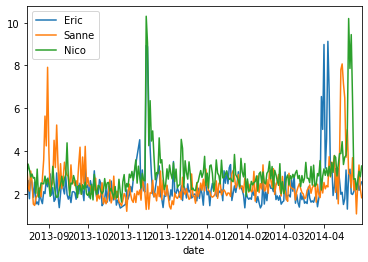

In [82]:
eric_daily_speed = grouped_birdday.speed_2d.mean()['Eric']
sanne_daily_speed = grouped_birdday.speed_2d.mean()['Sanne']
nico_daily_speed = grouped_birdday.speed_2d.mean()['Nico']
eric_daily_speed.plot(label = "Eric")
sanne_daily_speed.plot(label = "Sanne")
nico_daily_speed.plot(label = "Nico")
plt.legend(loc = 'upper left')
plt.show()